In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

In [23]:
df = pd.read_csv (r'D:\Universitas Indonesia\Semester 6\Pemodelan dan Pembelajaran Mesin\Code\4.Clustering\dataset.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [24]:
features = list(df.columns)[1:]
data = df[features]
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [25]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [30]:
kmeans_parameter = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

silhouette_coefficients = []

sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_parameter)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

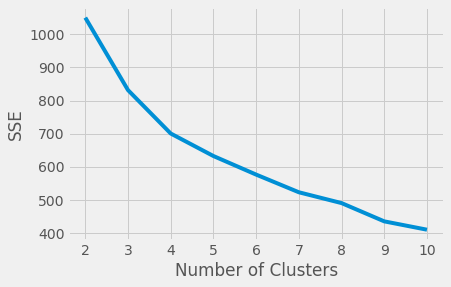

In [32]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(2, 11), sse)
 plt.xticks(range(2, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

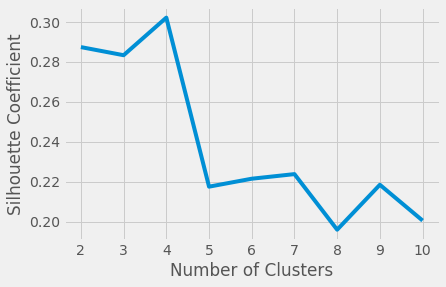

In [33]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()